# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 17.4 MB/s eta 0:00:00


validation on unseen dataset - this has very different format, size so the metrics fail miserably

# Run Inference

In [3]:
from pathlib import Path
import os, json
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/engr5315'
coco_yaml = os.path.join(base_dir, 'coco-custom-with-null.yaml')
project_dir = os.path.join(base_dir, 'runs')
runs_dirs = [
    os.path.join(project_dir, 'train'),
    os.path.join(project_dir, 'train2'),
    os.path.join(project_dir, 'train3'),
    os.path.join(project_dir, 'train4'),
    os.path.join(project_dir, 'train5'),
    os.path.join(project_dir, 'train6'),
    os.path.join(project_dir, 'train7'),
    os.path.join(project_dir, 'train8')
]

# best models for all trains, except last model with reduced mosaic
model_paths = [os.path.join(dir + '/weights', 'best.pt') for dir in runs_dirs[:-1]]
model_paths.append(os.path.join(runs_dirs[-1] + '/weights', 'last.pt'))
model_paths

['/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train2/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train3/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train4/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train5/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train6/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train7/weights/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/engr5315/runs/train8/weights/last.pt']

In [5]:
results_list = {}
for i, model_path in enumerate(model_paths):
  # print(i, model_path)
  model = YOLO(model_path)
  results = model.val(data=coco_yaml, split='test')
  results_list[f'Model {i+1}'] = results

# results_list

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [01:19<00:00,  1.10it/s]


                   all       1398       4780      0.785      0.638      0.703      0.518
                person        558       1222      0.818      0.586       0.68      0.458
               bicycle        114        207      0.733      0.531      0.559      0.372
                   car        496       1202      0.732       0.61      0.668      0.447
            motorcycle        161        261      0.802      0.651      0.735      0.524
                   bus        131        214      0.887      0.738      0.826      0.665
                 train        214        297      0.856      0.781      0.873       0.66
                 truck        277        428      0.628      0.547      0.595      0.427
         traffic light        176        465      0.715      0.482      0.546      0.325
          fire hydrant        185        191      0.895      0.801      0.847      0.673
             stop sign        170        187      0.807       0.77      0.824      0.731
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00,  9.92it/s]


                   all       1398       4780      0.814      0.678      0.758      0.567
                person        558       1222      0.848      0.635      0.735      0.503
               bicycle        114        207      0.778      0.585      0.681      0.448
                   car        496       1202      0.758      0.628      0.708      0.481
            motorcycle        161        261      0.873      0.686      0.778      0.578
                   bus        131        214      0.872      0.797      0.884      0.736
                 train        214        297      0.907      0.822      0.905      0.702
                 truck        277        428      0.684      0.622      0.666      0.505
         traffic light        176        465      0.779      0.499      0.595      0.351
          fire hydrant        185        191      0.923      0.791      0.879      0.713
             stop sign        170        187      0.805      0.794      0.858      0.747
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00,  9.81it/s]


                   all       1398       4780        0.8      0.634      0.707      0.522
                person        558       1222      0.842      0.577      0.685      0.449
               bicycle        114        207       0.72      0.527      0.586      0.388
                   car        496       1202      0.766      0.592      0.669      0.452
            motorcycle        161        261      0.862      0.667      0.729       0.51
                   bus        131        214      0.843      0.743      0.833      0.697
                 train        214        297      0.844      0.798      0.856      0.648
                 truck        277        428      0.644      0.548      0.588      0.436
         traffic light        176        465       0.75       0.48       0.57      0.334
          fire hydrant        185        191      0.904      0.796      0.848      0.674
             stop sign        170        187      0.836      0.749      0.825      0.721
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  9.28it/s]


                   all       1398       4780      0.838      0.707      0.787      0.607
                person        558       1222      0.871      0.659      0.769       0.54
               bicycle        114        207      0.836      0.642      0.726      0.523
                   car        496       1202      0.773      0.647      0.734      0.508
            motorcycle        161        261      0.895      0.713      0.826      0.616
                   bus        131        214      0.935       0.86       0.92      0.779
                 train        214        297      0.879      0.875      0.929      0.732
                 truck        277        428      0.735      0.657      0.726      0.572
         traffic light        176        465        0.8      0.538      0.629        0.4
          fire hydrant        185        191      0.901      0.812      0.871      0.731
             stop sign        170        187      0.795      0.802       0.86      0.769
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:20<00:00,  4.25it/s]


                   all       1398       4780      0.838      0.707      0.787      0.607
                person        558       1222      0.871      0.659      0.769       0.54
               bicycle        114        207      0.836      0.642      0.726      0.523
                   car        496       1202      0.773      0.647      0.734      0.508
            motorcycle        161        261      0.895      0.713      0.826      0.616
                   bus        131        214      0.935       0.86       0.92      0.779
                 train        214        297      0.879      0.875      0.929      0.732
                 truck        277        428      0.735      0.657      0.726      0.572
         traffic light        176        465        0.8      0.538      0.629        0.4
          fire hydrant        185        191      0.901      0.812      0.871      0.731
             stop sign        170        187      0.795      0.802       0.86      0.769
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  9.72it/s]


                   all       1398       4780      0.813      0.717      0.786      0.608
                person        558       1222      0.845      0.671      0.765      0.541
               bicycle        114        207      0.772      0.647      0.725      0.529
                   car        496       1202      0.748      0.652      0.731      0.509
            motorcycle        161        261      0.899      0.719      0.827      0.614
                   bus        131        214      0.904       0.85      0.925      0.784
                 train        214        297      0.858      0.877      0.926      0.732
                 truck        277        428      0.714      0.673      0.734      0.576
         traffic light        176        465      0.773      0.563      0.627        0.4
          fire hydrant        185        191      0.896      0.814       0.87      0.731
             stop sign        170        187       0.79      0.829      0.866      0.773
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.00it/s]


                   all       1398       4780      0.828      0.669      0.752      0.574
                person        558       1222      0.843      0.645      0.737      0.515
               bicycle        114        207      0.826      0.529       0.68      0.476
                   car        496       1202      0.745      0.613       0.69       0.47
            motorcycle        161        261      0.873       0.72      0.813      0.587
                   bus        131        214      0.925      0.806      0.892      0.745
                 train        214        297      0.883      0.832      0.901      0.697
                 truck        277        428      0.727      0.629      0.694      0.538
         traffic light        176        465      0.767      0.497       0.58      0.365
          fire hydrant        185        191      0.935      0.757      0.841      0.705
             stop sign        170        187      0.801      0.781      0.841      0.751
         parking mete

val: Scanning /content/drive/MyDrive/Colab Notebooks/engr5315/datasets/coco-custom-with-null/labels/test.cache... 1331 images, 67 backgrounds, 0 corrupt: 100%|██████████| 1398/1398 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08<00:00, 10.57it/s]


                   all       1398       4780      0.828      0.711      0.787      0.608
                person        558       1222      0.853      0.667      0.766      0.543
               bicycle        114        207      0.834      0.618      0.721      0.533
                   car        496       1202      0.769      0.655      0.736       0.51
            motorcycle        161        261        0.9      0.716       0.83      0.617
                   bus        131        214      0.895       0.84      0.915      0.776
                 train        214        297      0.888      0.869       0.93      0.737
                 truck        277        428      0.743       0.67      0.743      0.581
         traffic light        176        465      0.781      0.552      0.626      0.398
          fire hydrant        185        191      0.904      0.822      0.873      0.722
             stop sign        170        187      0.798      0.813      0.869      0.776
         parking mete

In [6]:
model_names = list(results_list.keys())
print(model_names)

class_names = results_list['Model 1'].names
print(class_names)

for model, results in results_list.items():
  print(model, results.class_result(0))

['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8']
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'bus', 5: 'train', 6: 'truck', 7: 'traffic light', 8: 'fire hydrant', 9: 'stop sign', 10: 'parking meter'}
Model 1 (0.8182626356532188, 0.5859247135842881, 0.6800157576983095, 0.4578763002471538)
Model 2 (0.8480461980554505, 0.6350245499181669, 0.7352140788421064, 0.5034488525869517)
Model 3 (0.8423535195200513, 0.5771822937588725, 0.6854379491375864, 0.4490300254369706)
Model 4 (0.8711882434381993, 0.6586160983699075, 0.768570573941901, 0.5403847774478953)
Model 5 (0.8711882434381993, 0.6586160983699075, 0.768570573941901, 0.5403847774478953)
Model 6 (0.8453436470507425, 0.670943012397187, 0.7650474152706306, 0.540642338459004)
Model 7 (0.8427618610735266, 0.644752695240879, 0.7368678814966725, 0.5153942477220116)
Model 8 (0.8525528418884977, 0.6671644822523907, 0.7662585623420982, 0.5434184223853376)


---
# Results Plot

## Metrics per Category

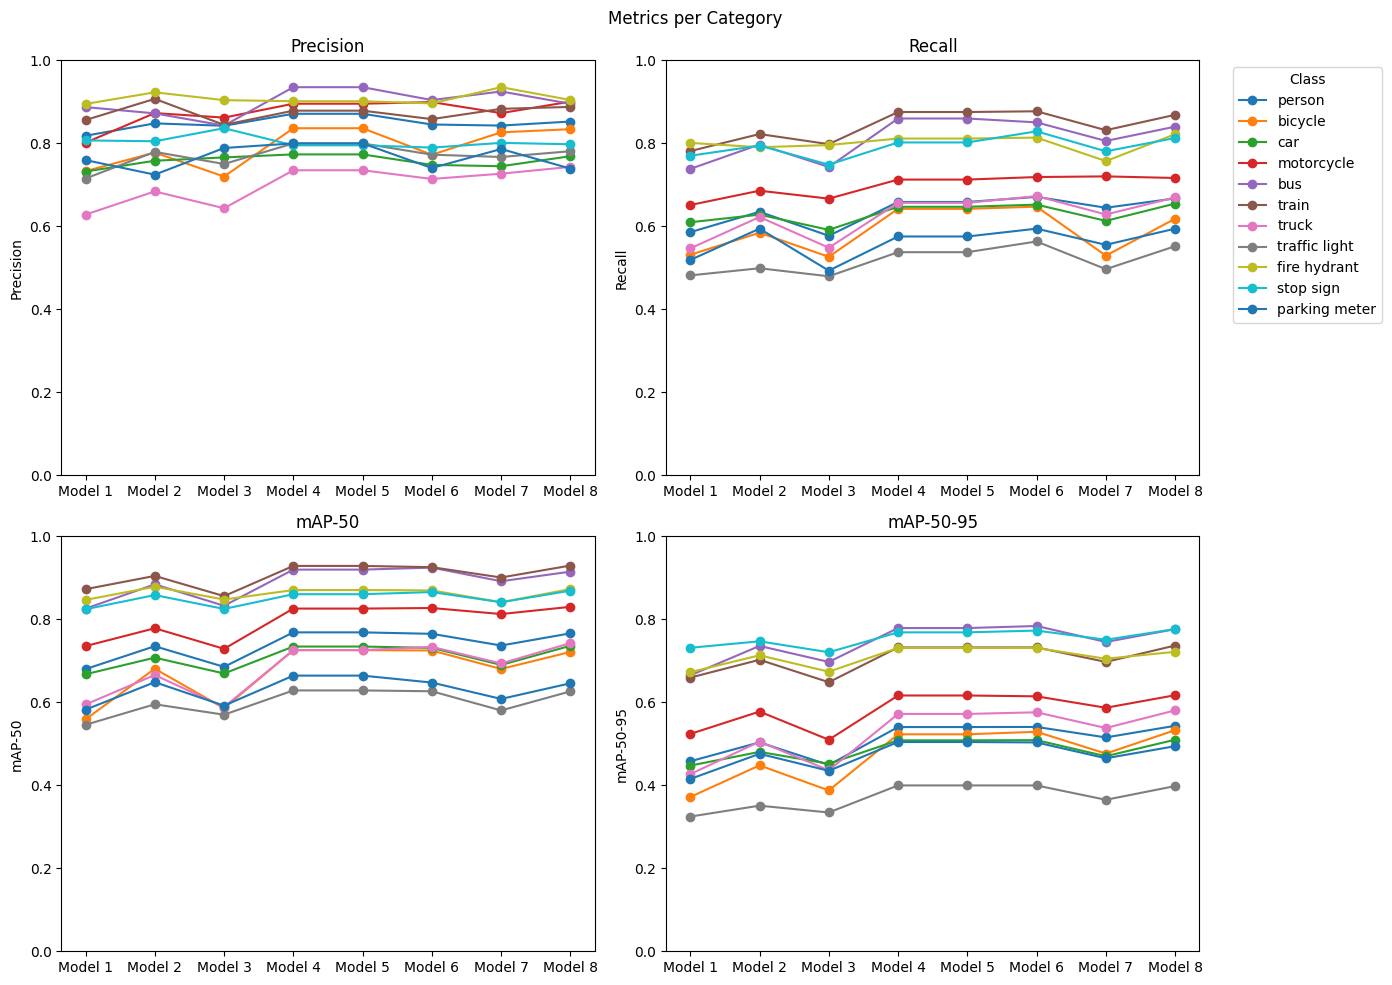

In [7]:
class_precision = {cls: [] for cls in class_names}
class_recall = {cls: [] for cls in class_names}
class_map50 = {cls: [] for cls in class_names}
class_map50_95 = {cls: [] for cls in class_names}

for model, result in results_list.items():
  for i, cls_name in enumerate(class_names):
    class_result = result.class_result(i)  # Get results for class i
    precision = class_result[0]
    recall = class_result[1]
    map50 = class_result[2]
    map50_95 = class_result[3]

    class_precision[cls_name].append(precision)
    class_recall[cls_name].append(recall)
    class_map50[cls_name].append(map50)
    class_map50_95[cls_name].append(map50_95)

fig, axs = plt.subplots(2,2, figsize=(14,10))
plt.suptitle('Metrics per Category')

for cls in class_names:
    axs[0,0].plot(model_names, class_precision[cls], marker='o', label=class_names[cls])
axs[0,0].set(title='Precision', ylabel='Precision', ylim=[0,1])

for cls in class_names:
    axs[0,1].plot(model_names, class_recall[cls], marker='o', label=class_names[cls])
axs[0,1].set(title='Recall', ylabel='Recall', ylim=[0,1])
axs[0,1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

for cls in class_names:
    axs[1,0].plot(model_names, class_map50[cls], marker='o', label=class_names[cls])
axs[1,0].set(title='mAP-50', ylabel='mAP-50', ylim=[0,1])

for cls in class_names:
    axs[1,1].plot(model_names, class_map50_95[cls], marker='o', label=class_names[cls])
axs[1,1].set(title='mAP-50-95', ylabel='mAP-50-95', ylim=[0,1])

plt.tight_layout()
plt.show()

In [8]:
results_dir = base_dir + '/runs'
precision_df = pd.DataFrame(class_precision, index=model_names)
precision_df.to_csv(results_dir + '/val_precision_results.csv')

recall_df = pd.DataFrame(class_recall, index=model_names)
recall_df.to_csv(results_dir + '/val_recall_results.csv')

f1_df = pd.DataFrame(class_map50, index=model_names)
f1_df.to_csv(results_dir + '/val_map50_results.csv')

map_df = pd.DataFrame(class_map50_95, index=model_names)
map_df.to_csv(results_dir + '/map_map50_95_results.csv')

combined_df = pd.DataFrame()

for cls in class_names:
    combined_df[f'{cls}_precision'] = class_precision[cls]
    combined_df[f'{cls}_recall'] = class_recall[cls]
    combined_df[f'{cls}_mAP50'] = class_map50[cls]
    combined_df[f'{cls}_mAP50_95'] = class_map50_95[cls]

combined_df.index = model_names
combined_df.to_csv(results_dir + '/combined_metrics_results.csv')
combined_df

,0_precision,0_recall,0_mAP50,0_mAP50_95,1_precision,1_recall,1_mAP50,1_mAP50_95,2_precision,2_recall,...,8_mAP50,8_mAP50_95,9_precision,9_recall,9_mAP50,9_mAP50_95,10_precision,10_recall,10_mAP50,10_mAP50_95
Model 1,0.818263,0.585925,0.680016,0.457876,0.732983,0.531401,0.559009,0.371865,0.732005,0.609817,...,0.846795,0.672680,0.807010,0.770053,0.824308,0.731408,0.759595,0.518868,0.582215,0.415280
Model 2,0.848046,0.635025,0.735214,0.503449,0.777699,0.584541,0.680920,0.448031,0.758034,0.628125,...,0.878537,0.713297,0.804942,0.794447,0.858476,0.747043,0.724491,0.594340,0.648516,0.475887
Model 3,0.842354,0.577182,0.685438,0.449030,0.719904,0.526570,0.585766,0.387606,0.766050,0.591514,...,0.847719,0.673819,0.836456,0.748663,0.825020,0.720622,0.788755,0.493176,0.591959,0.434953
Model 4,0.871188,0.658616,0.768571,0.540385,0.836386,0.642083,0.725753,0.522926,0.773300,0.647032,...,0.870538,0.730965,0.795218,0.802139,0.860485,0.768601,0.799834,0.575472,0.664340,0.504310
Model 5,0.871188,0.658616,0.768571,0.540385,0.836386,0.642083,0.725753,0.522926,0.773300,0.647032,...,0.870538,0.730965,0.795218,0.802139,0.860485,0.768601,0.799834,0.575472,0.664340,0.504310
Model 6,0.845344,0.670943,0.765047,0.540642,0.772477,0.647343,0.724826,0.528985,0.748012,0.652246,...,0.869671,0.730854,0.789681,0.828877,0.865709,0.772884,0.740490,0.594340,0.647592,0.503283
Model 7,0.842762,0.644753,0.736868,0.515394,0.826489,0.529268,0.680387,0.476446,0.744803,0.613145,...,0.841111,0.705012,0.801075,0.780749,0.841170,0.750787,0.786296,0.555392,0.608152,0.465157
Model 8,0.852553,0.667164,0.766259,0.543418,0.834068,0.618357,0.721407,0.532889,0.768948,0.654742,...,0.872974,0.721713,0.797736,0.812834,0.869057,0.776469,0.739092,0.594340,0.645850,0.494277


## Convergence Plot Comparison

In [9]:
def trim_column_names(columns):
  return [col.strip() for col in columns]

dfs = []
for runs_dir in runs_dirs:
  df = pd.read_csv(runs_dir + '/results.csv')
  df.columns = trim_column_names(df.columns)
  dfs.append(df)

accuracy_metrics = ['metrics/precision(B)','metrics/recall(B)','metrics/mAP50(B)','metrics/mAP50-95(B)']
accuracy_df = pd.concat([df[accuracy_metrics] for df in dfs],
                        axis=1,
                        keys=model_names)

loss_metrics = ['train/box_loss','val/box_loss','train/cls_loss','val/cls_loss']
loss_df = pd.concat([df[loss_metrics] for df in dfs],
                    axis=1,
                    keys=model_names)

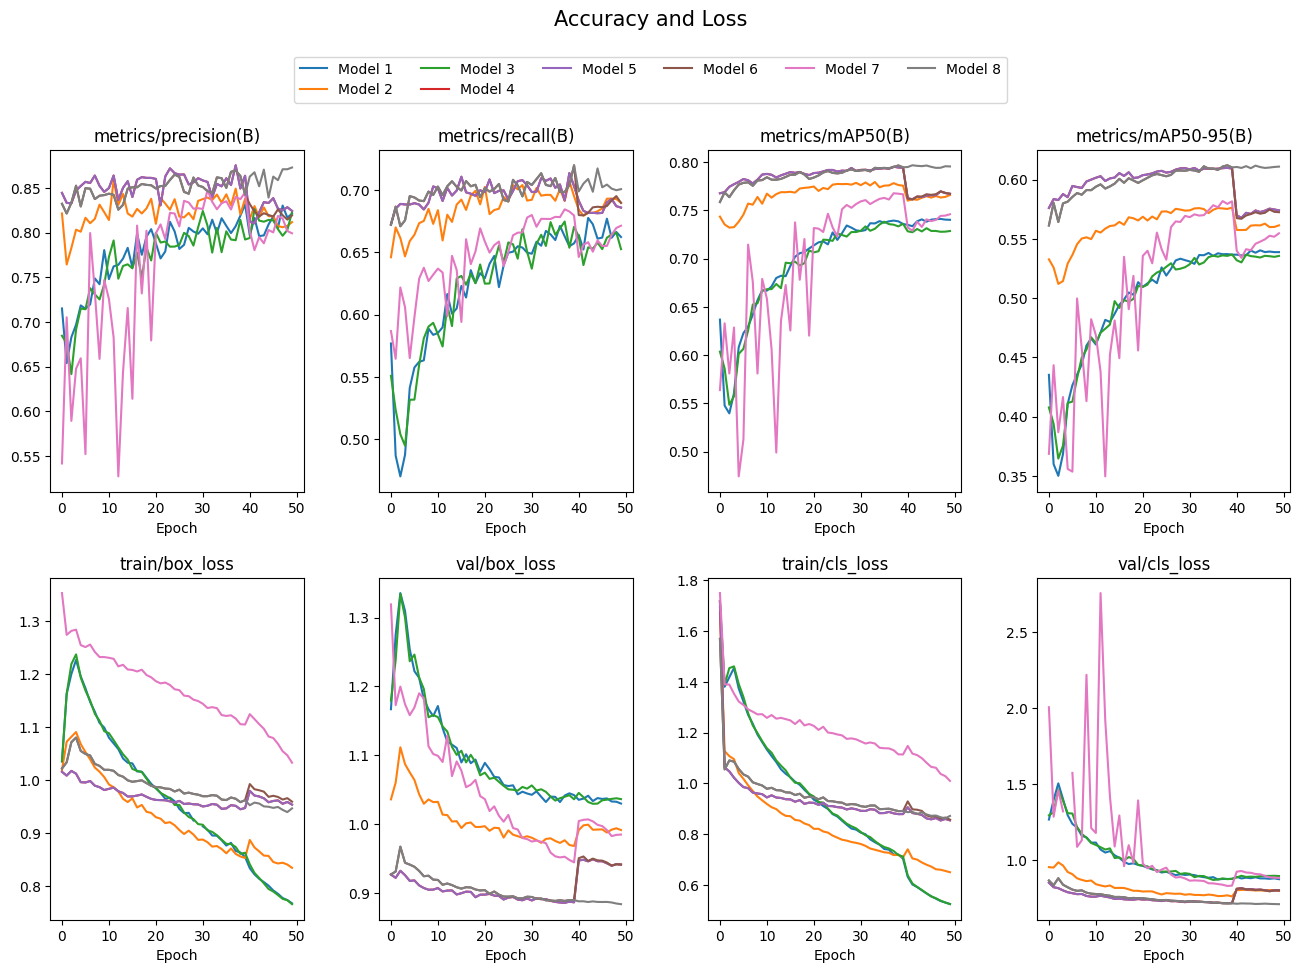

In [10]:
fig,axs = plt.subplots(2,4, figsize=(16,10))

for i, metric in enumerate(accuracy_metrics):
  accuracy_df.xs(metric, axis=1, level=1).plot(ax=axs[0,i], legend=False)
  axs[0,i].set(title=metric, xlabel='Epoch')

for i, metric in enumerate(loss_metrics):
  loss_df.xs(metric, axis=1, level=1).plot(ax=axs[1,i], legend=False)
  axs[1,i].set(title=metric, xlabel='Epoch')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=6)
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.suptitle('Accuracy and Loss', fontsize=15, y=1.02)
plt.show()

## Confusion Matrix

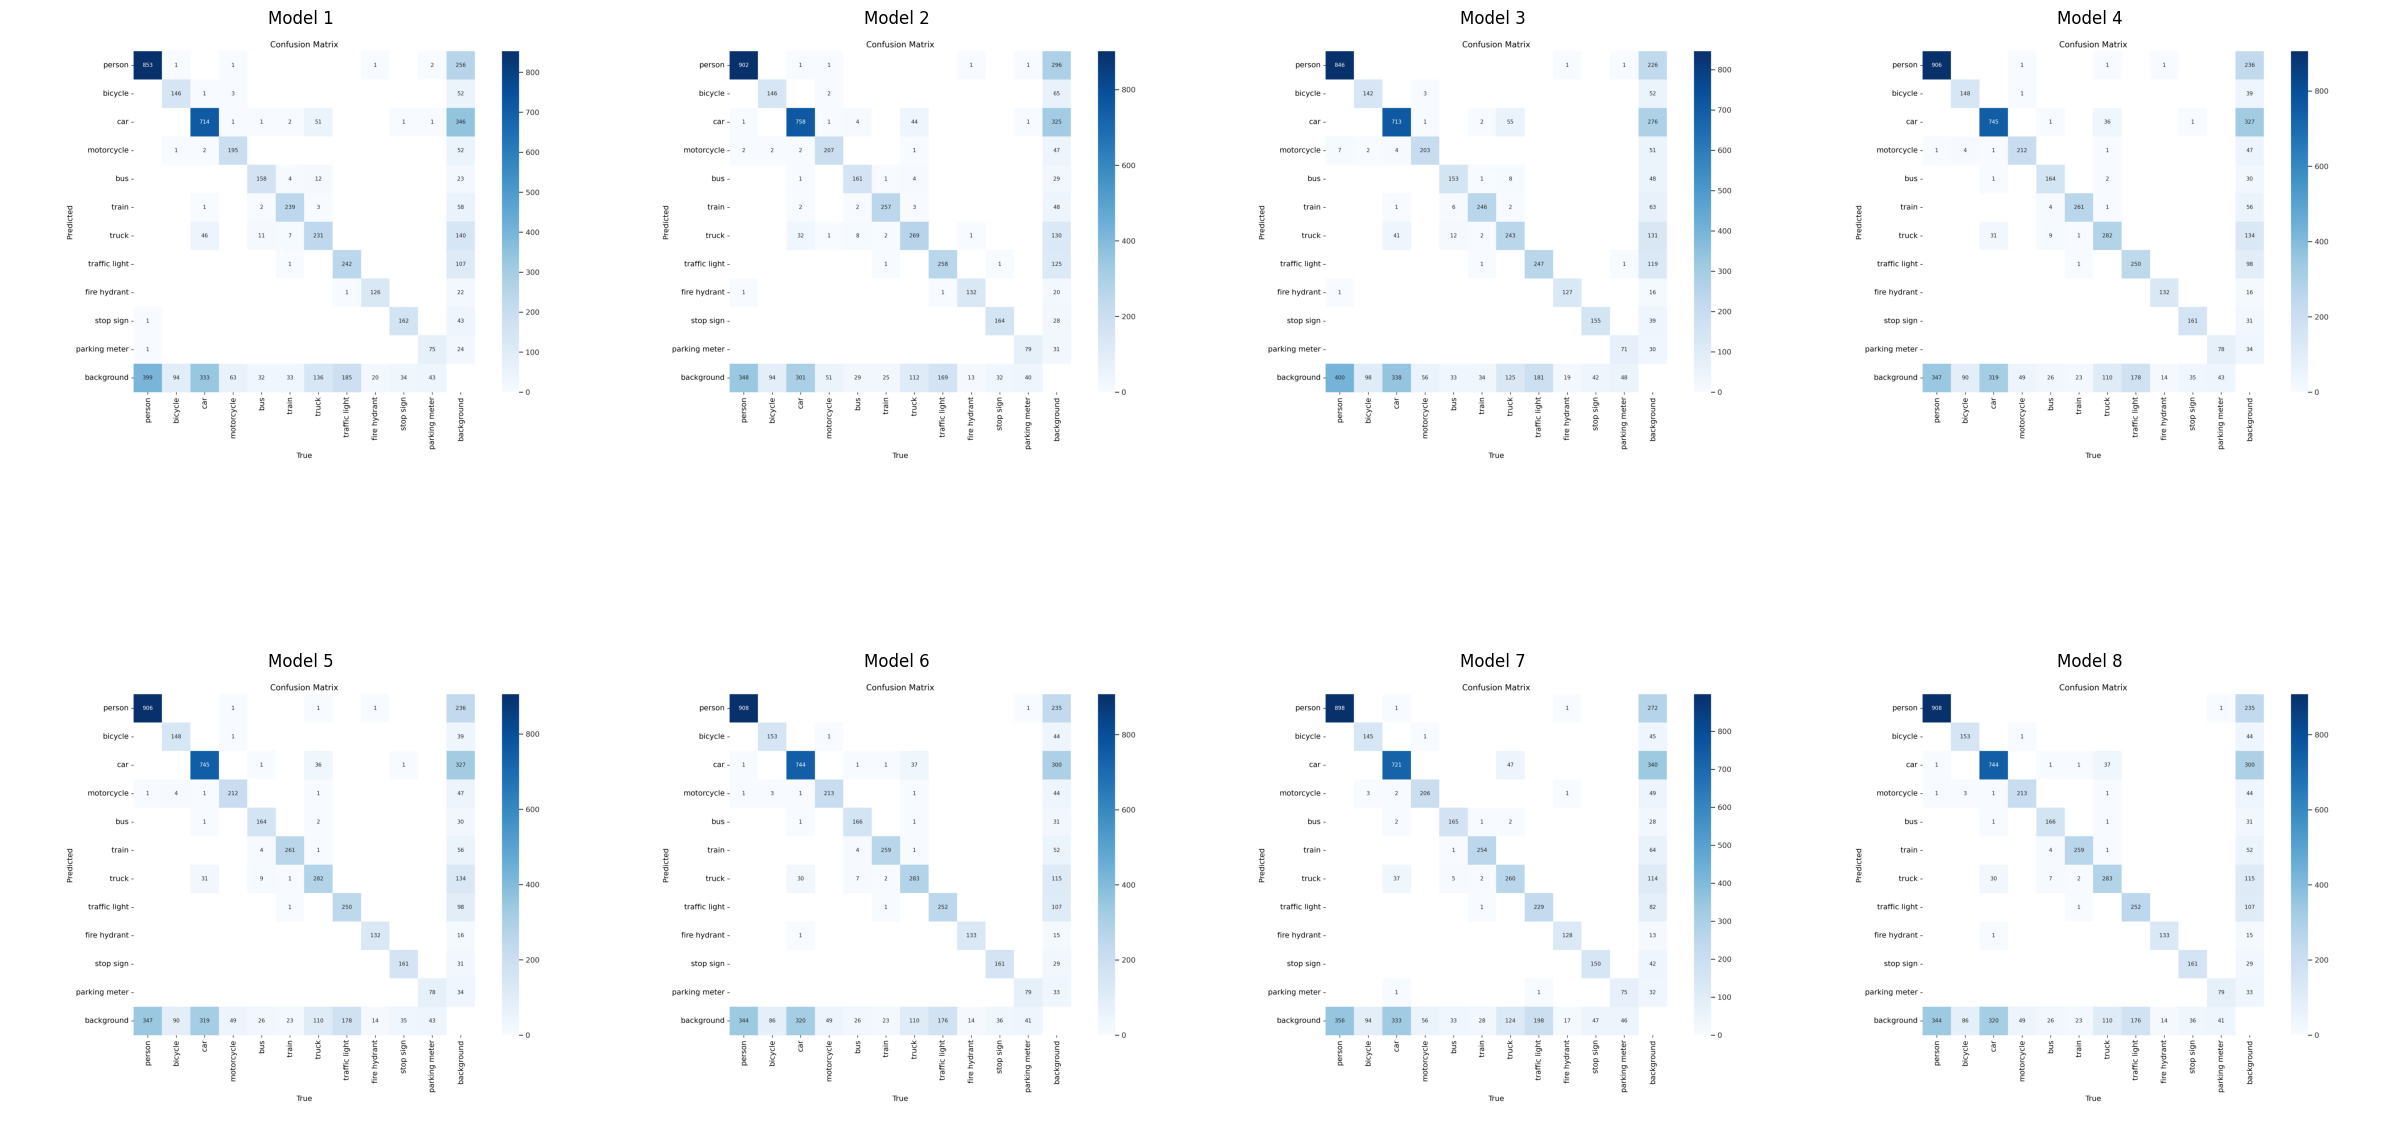

In [18]:
images = []
for runs_dir in runs_dirs:
  image = cv2.imread(runs_dir + '/confusion_matrix.png')
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image_rgb)


fig,axs = plt.subplots(2,4, figsize=(24,15))

for i, ax in enumerate(axs.flat):
  ax.imshow(images[i])
  ax.set(title=model_names[i])
  ax.axis('off')

plt.tight_layout()
plt.show()

## Precision-Recall Curve

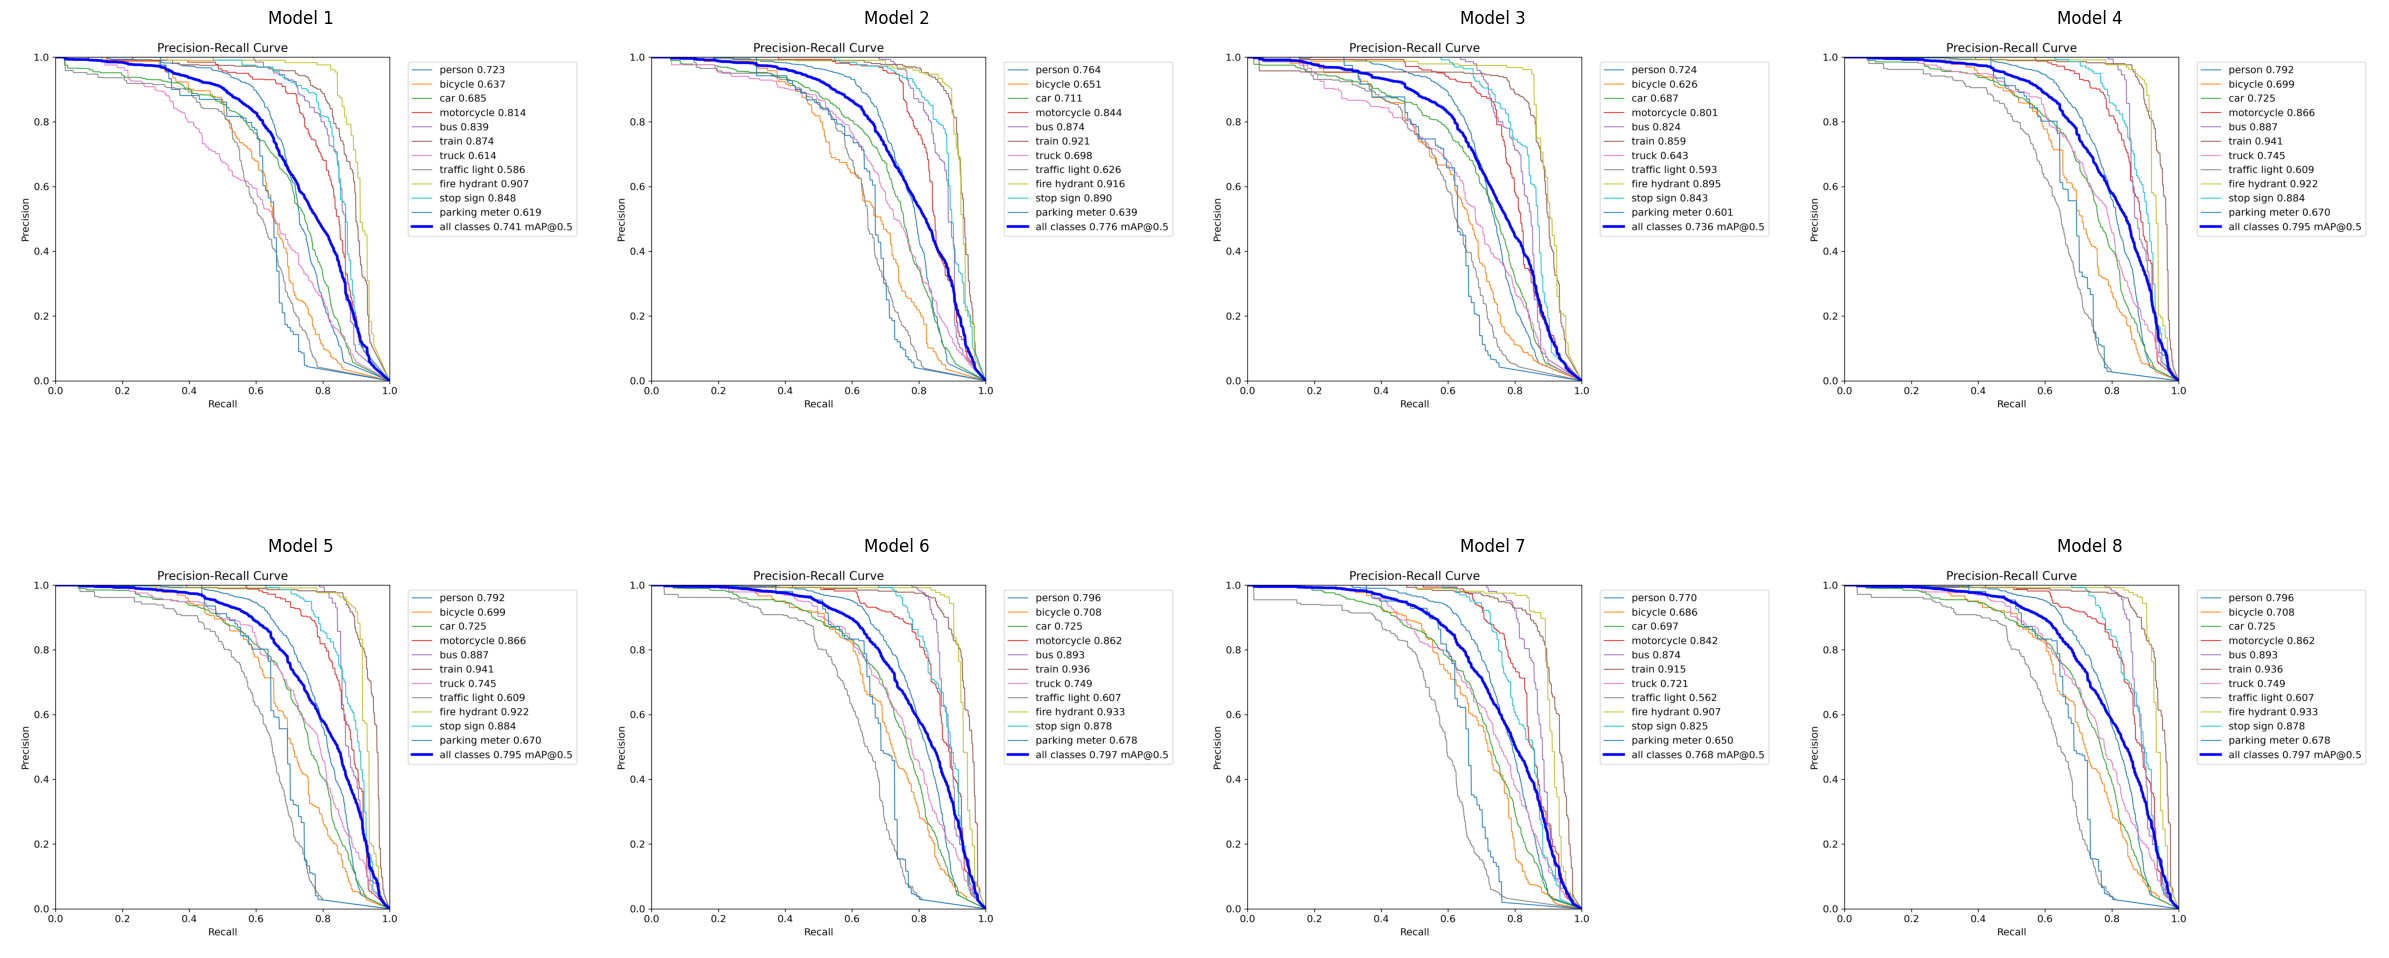

In [17]:
images = []
for runs_dir in runs_dirs:
  image = cv2.imread(runs_dir + '/PR_curve.png')
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image_rgb)

fig,axs = plt.subplots(2,4, figsize=(24,12))

for i, ax in enumerate(axs.flat):
  ax.imshow(images[i])
  ax.set(title=model_names[i])
  ax.axis('off')

plt.tight_layout()
plt.show()

## Regression Loss, Classification Loss, mAP

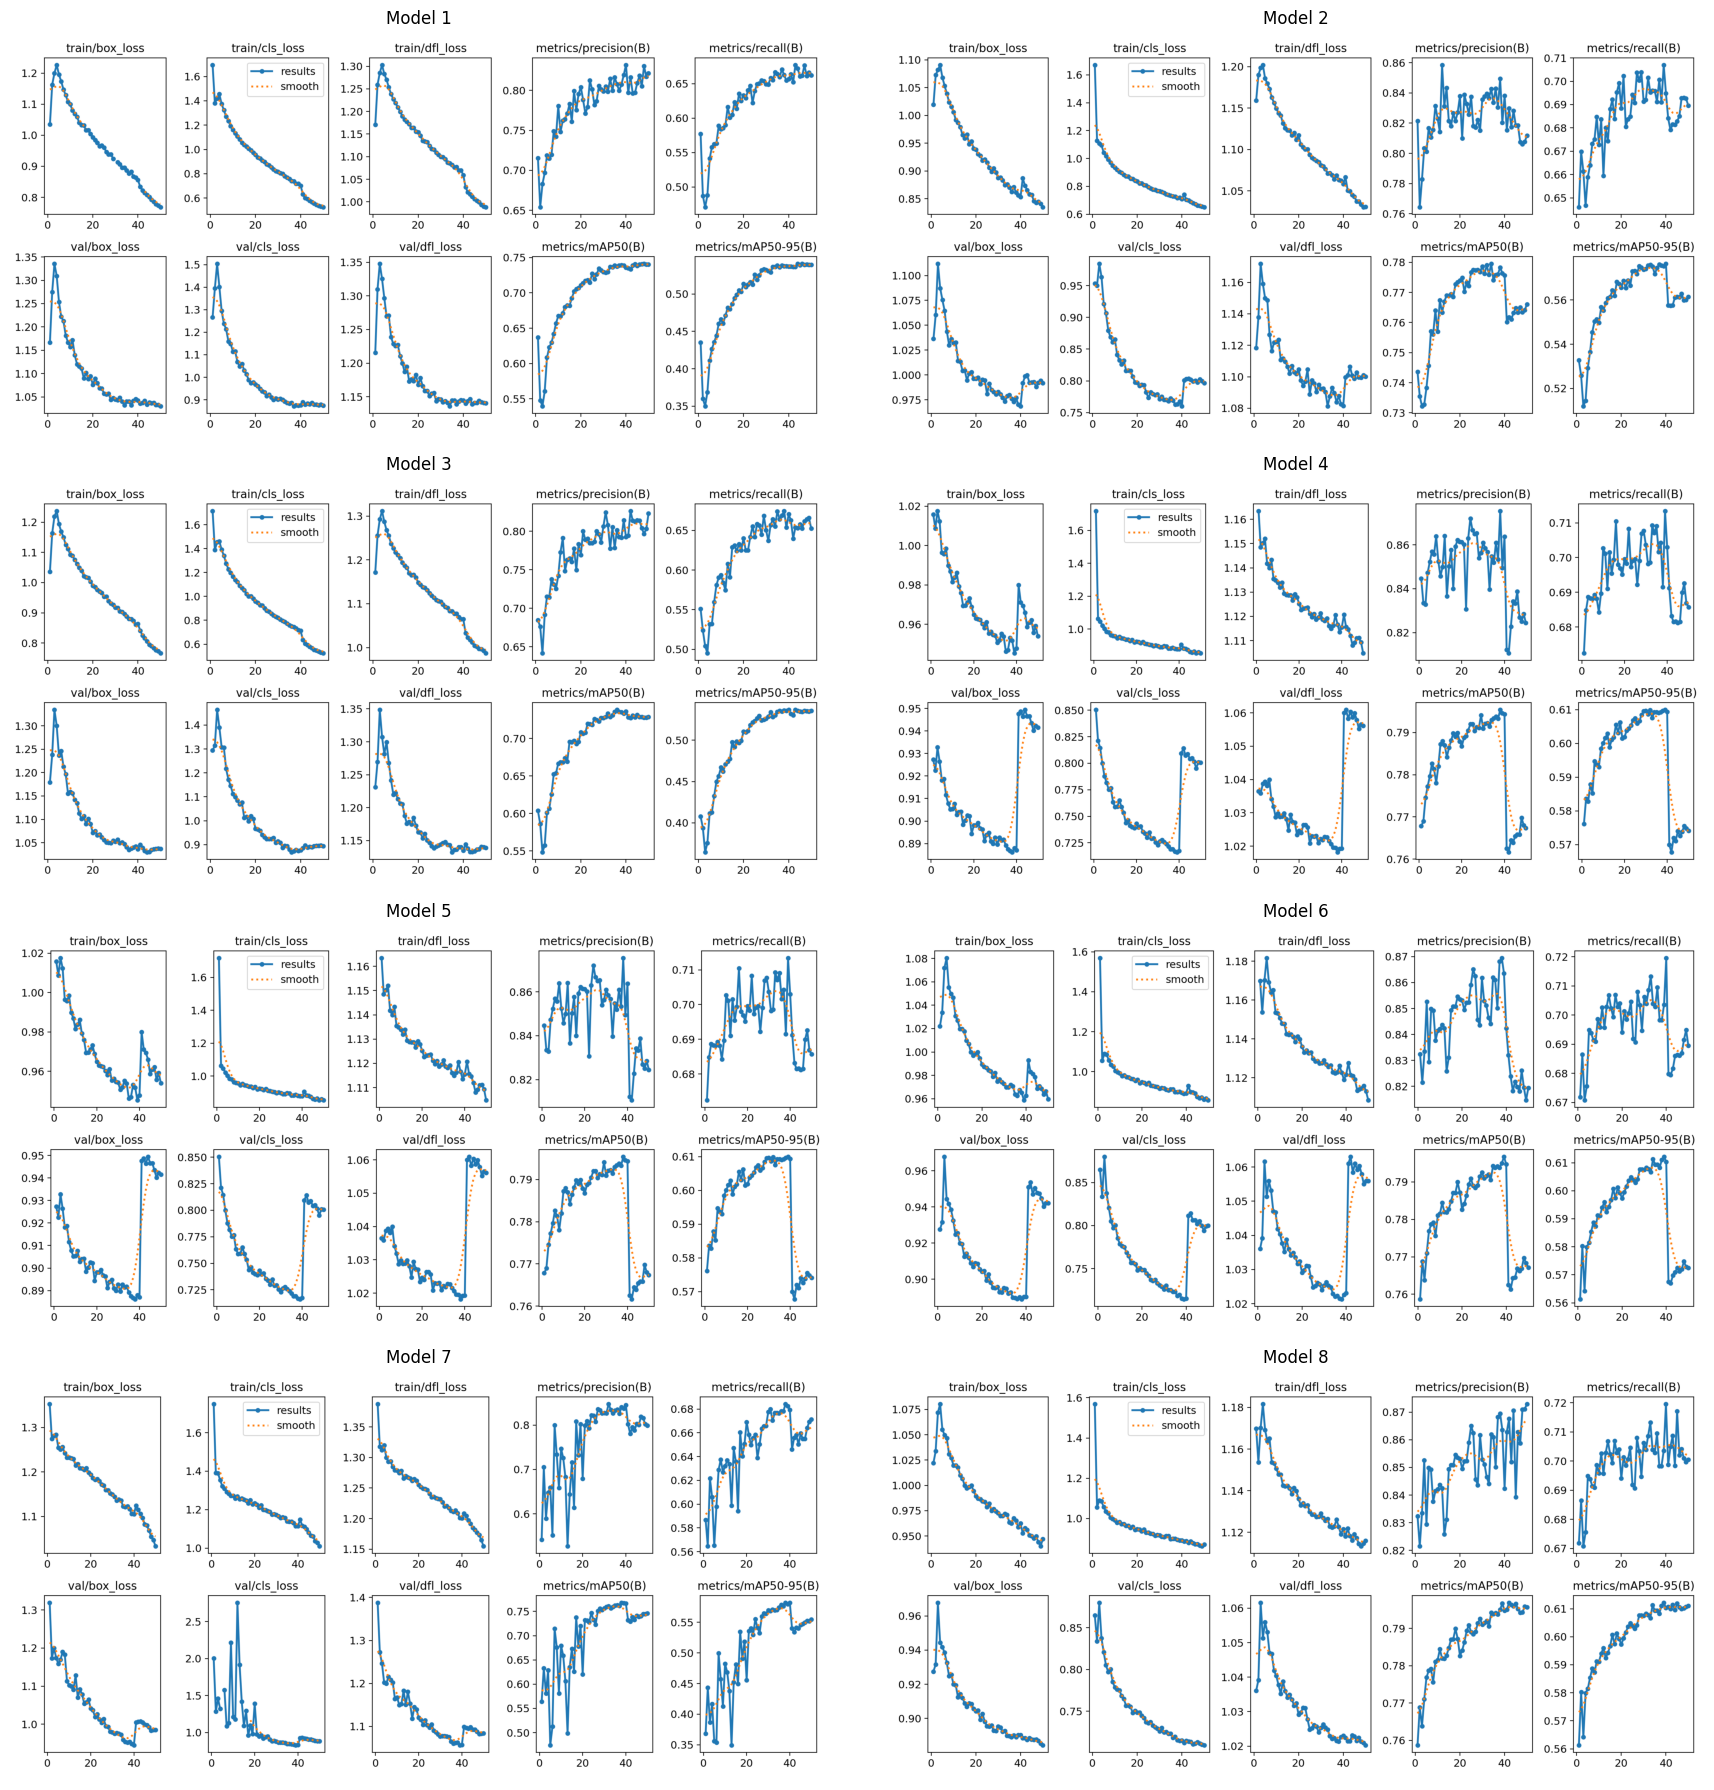

In [16]:
images = []
for runs_dir in runs_dirs:
  image = cv2.imread(runs_dir + '/results.png')
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image_rgb)

fig,axs = plt.subplots(4,2, figsize=(18,18))

for i, ax in enumerate(axs.flat):
  ax.imshow(images[i])
  ax.set(title=model_names[i])
  ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
map_df = pd.read_csv(base_dir + '/runs/val_map50_results.csv', header=0)
map_df.rename(columns={map_df.columns[0]:'Runs'}, inplace=True)
numeric_columns = map_df.columns[1:]
map_df['mAP50'] = map_df[numeric_columns].mean(axis=1, numeric_only=True)
map_df

,Runs,0,1,2,3,4,5,6,7,8,9,10,mAP50
0,Model 1,0.680016,0.559009,0.667607,0.735485,0.825796,0.872638,0.594787,0.545813,0.846795,0.824308,0.582215,0.703134
1,Model 2,0.735214,0.680920,0.707604,0.778476,0.884302,0.904654,0.665770,0.595273,0.878537,0.858476,0.648516,0.757977
2,Model 3,0.685438,0.585766,0.669466,0.728891,0.832673,0.855911,0.588469,0.570145,0.847719,0.825020,0.591959,0.707405
3,Model 4,0.768571,0.725753,0.734402,0.825880,0.919789,0.928721,0.725756,0.628644,0.870538,0.860485,0.664340,0.786625
4,Model 5,0.768571,0.725753,0.734402,0.825880,0.919789,0.928721,0.725756,0.628644,0.870538,0.860485,0.664340,0.786625
5,Model 6,0.765047,0.724826,0.731164,0.827227,0.924595,0.925637,0.733545,0.626608,0.869671,0.865709,0.647592,0.785602
6,Model 7,0.736868,0.680387,0.690056,0.812711,0.891755,0.900763,0.693581,0.580382,0.841111,0.841170,0.608152,0.752449
7,Model 8,0.766259,0.721407,0.736235,0.830107,0.914930,0.929644,0.742712,0.626383,0.872974,0.869057,0.645850,0.786869
